In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.datasets import load_boston
from sklearn.externals import joblib
import sklearn.metrics as sklm
%matplotlib inline

In [7]:
f = r'DATASETS\HOUSEPRICES\min_data.csv'
df = pd.read_csv(f)
df

,TotalSF,LotArea,BedroomAbvGr,SalePrice
0,1710,8450,3,208500
1,1262,9600,3,181500
2,1786,11250,3,223500
3,1717,9550,3,140000
4,2198,14260,4,250000
5,1362,14115,1,143000
6,1694,10084,3,307000
7,2090,10382,3,200000
8,1774,6120,2,129900
9,1077,7420,2,118000


In [40]:


scaler = StandardScaler()

features = ['TotalSF', 'LotArea', 'BedroomAbvGr']
df_X = df[features]
scaler.fit(df_X)
X = np.c_[np.ones(len(df_X)), scaler.transform(df_X)]

y = df.SalePrice.values.reshape(-1, 1)

In [41]:
X

array([[ 1.        ,  0.38461917, -0.20714171,  0.16377912],
       [ 1.        , -0.47529041, -0.09188637,  0.16377912],
       [ 1.        ,  0.53049669,  0.07347998,  0.16377912],
       ...,
       [ 1.        ,  1.59386701, -0.14781027,  1.39002276],
       [ 1.        , -0.82846755, -0.08016039, -1.06246453],
       [ 1.        , -0.48680705, -0.05811155,  0.16377912]])

In [42]:
def cost(X, y, θ):
    return np.sum(np.square(np.matmul(X, θ) - y))/(2*len(y))

def gradient_descent(X, y, λ=0.01, niters=1000, ϵ=1e-4):
    θ = np.zeros((X.shape[1], 1))
    Jh = [cost(X, y, θ)]
    for i in range(niters):
        e = np.matmul(X, θ) - y
        dJ = np.matmul(X.T, e)/len(y)
        θ = θ - (λ * dJ)
        J = cost(X, y, θ)
        Jh.append(J)
        v = abs((Jh[-1] - Jh[-2])/Jh[-2])
        if v <= ϵ:
            print(f'Reached min at iter {i}')
            break
        
    return θ, Jh

θ, J_history = gradient_descent(X, y)
θ

Reached min at iter 466


array([[179264.94804304],
       [ 61392.17460728],
       [  7347.45163826],
       [-17041.50138107]])

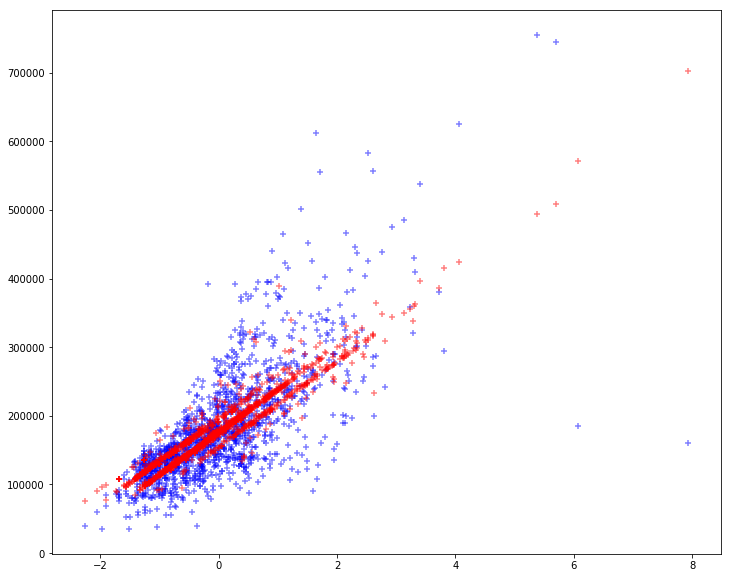

In [45]:
y_predict = np.matmul(X, θ)

fig, ax = plt.subplots(figsize=(12,10))
ax.scatter(X[:,1], y, marker='+', c='b', alpha=.5)
ax.scatter(X[:,1], y_predict, marker='+', c='r', alpha=.5)


In [39]:
error, r2_score = sklm.mean_absolute_error(y, y_predict), sklm.r2_score(y, y_predict)
print(f'Error: {error} R2: {r2_score}')

Error: 37255.738488521725 R2: 0.5115345434842413


In [46]:
error, r2_score = sklm.mean_absolute_error(y, y_predict), sklm.r2_score(y, y_predict)
print(f'Error: {error} R2: {r2_score}')

Error: 34650.908755096556 R2: 0.5703269822131221


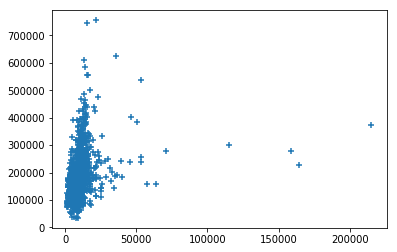

In [24]:
fig, ax = plt.subplots()
ax.scatter(df.LotArea, y, marker='+')

In [6]:
data = load_boston()

In [17]:
data.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [8]:
df_X = pd.DataFrame(data.data, columns=data.feature_names)
df_X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [28]:
scaler = StandardScaler()
scaler.fit(df_X)
X_scaled = np.c_[np.ones(len(df_X)), scaler.transform(df_X)]
y = data.target.reshape(-1, 1)

In [29]:
def cost(X, y, θ):
    return np.sum(np.square(np.matmul(X, θ) - y))/(2*len(y))

def gradient_descent(X, y, λ=0.01, niters=1000, ϵ=1e-3):
    θ = np.zeros((X.shape[1], 1))
    Jh = [cost(X, y, θ)]
    for i in range(niters):
        e = np.matmul(X, θ) - y
        dJ = np.matmul(X.T, e)/len(y)
        θ = θ - (λ * dJ)
        J = cost(X, y, θ)
        Jh.append(J)
        v = abs((Jh[-1] - Jh[-2])/Jh[-2])
        if v <= ϵ:
            print(f'Reached min at iter {i}')
            break
        
    return θ, Jh

θ, Jh = gradient_descent(X_scaled, y)
θ

Reached min at iter 310


array([[21.54343162],
       [-0.62083539],
       [ 0.49084718],
       [-0.43195548],
       [ 0.83415794],
       [-0.72933792],
       [ 3.24236879],
       [-0.15685005],
       [-1.72210215],
       [ 0.62110142],
       [-0.43181043],
       [-1.77576659],
       [ 0.86439639],
       [-3.22279698]])

In [27]:
y.shape, y_predict.shape, θ.shape, X_scaled.shape

((506,), (506, 506), (14, 506), (506, 14))

In [30]:
y_predict = np.matmul(X_scaled, θ)
mse, error, r2_score = sklm.mean_squared_error(y, y_predict), sklm.mean_absolute_error(y, y_predict), sklm.r2_score(y, y_predict)
print(f'MSE: {mse} error: {error} r2: {r2_score}')

MSE: 24.181424587393607 error: 3.192012617284485 r2: 0.7135566012375021


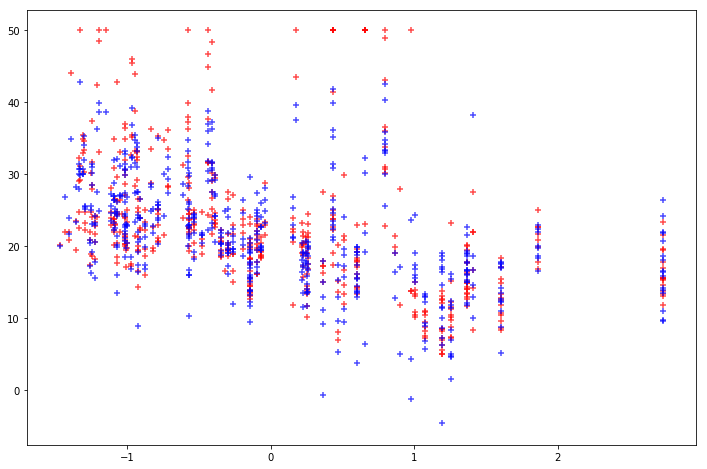

In [36]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X_scaled[:, 5], y, marker='+', c='r', alpha=.7)
ax.scatter(X_scaled[:, 5], y_predict, marker='+', c='b', alpha=.7)

In [2]:
!DIR DATASETS\HOUSEPRICE

 Volume in drive N is RRVARRA_DATA
 Volume Serial Number is C6A7-C0FD

 Directory of N:\DOWNLOADS\Python\AI-ML\DATASETS\HOUSEPRICES

04/01/2018  11:23 AM    <DIR>          .
04/01/2018  11:23 AM    <DIR>          ..
03/26/2018  03:11 PM            13,370 data_description.txt
03/26/2018  03:39 PM            29,518 min_data.csv
03/26/2018  03:11 PM           451,405 test.csv
03/26/2018  03:11 PM           460,676 train.csv
               4 File(s)        954,969 bytes
               2 Dir(s)  494,707,286,016 bytes free


In [3]:
def plot_lr(X, y, θ):
    fig, ax = plt.subplots(figsize=(10,6))
    x = X[:,1]
    ax.scatter(x, y, marker='+', alpha=.7)
    ax.set_xlabel('SqFT in K')
    ax.set_ylabel('SalePrice in $100K')
    ax.set_title('House Prices vs SqFT', fontsize=16)
    x_predict = np.linspace(x.min(), x.max(), 100)
    y_predict = θ[0] + x_predict*θ[1]
    ax.plot(x_predict, y_predict, c='r')
    
df = pd.read_csv(r'DATASETS\HOUSEPRICES\min_data.csv')
df = df[(df.TotalSF <= 3000) & (df.SalePrice <= 500000)]
X = df.TotalSF / 1000
y = (df.SalePrice / 100000).values.reshape(-1, 1)
X = np.c_[np.ones(len(X)), X.values]

TypeError: plot_lr() missing 1 required positional argument: 'θ'

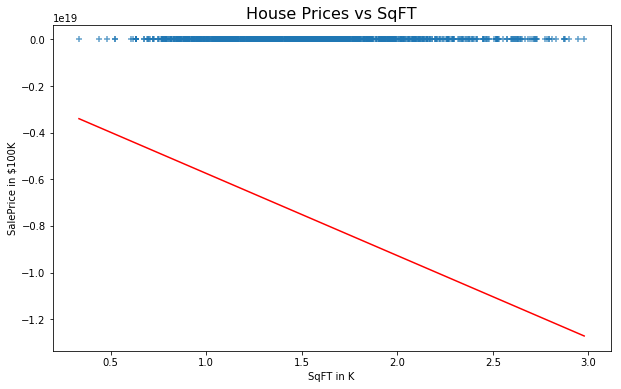

In [54]:
def cost(X, y, θ):
    return np.sum(np.square(np.matmul(X, θ) - y))/(2*len(y))

def gradient_descent(X, y, λ=0.01, niters=1000, ϵ=1e-3):
    θ = np.zeros((X.shape[1], 1))
    Jh = [cost(X, y, θ)]
    for i in range(niters):
        e = np.matmul(X, θ) - y
        dJ = np.matmul(X.T, e)/len(y)
        θ = θ - (λ * dJ)
        J = cost(X, y, θ)
        Jh.append(J)
        v = abs((Jh[-1] - Jh[-2])/Jh[-2])
        if v <= ϵ:
            print(f'Reached min at iter {i}')
            break
        
    return θ, Jh

θ, Jh = gradient_descent(X, y, θ, λ=1, niters=50)
plot_lr(X, y, θ)

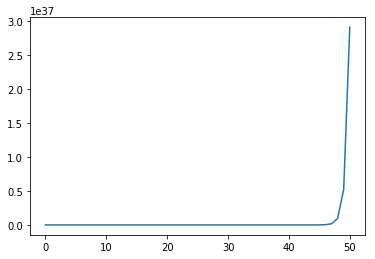

In [55]:
plt.plot(Jh)

In [26]:
np.array([[0],[0]])

array([[0],
       [0]])

In [67]:
ix = np.arange(10)
np.random.shuffle(ix)
ix

array([9, 1, 0, 6, 2, 7, 3, 5, 8, 4])

In [73]:
df = pd.DataFrame({'A': np.arange(10), 'B': list("ABCDEFGHIJKL")[:10]}, index=list("ABCDEFGHIJKL")[:10])
df

,A,B
A,0,A
B,1,B
C,2,C
D,3,D
E,4,E
F,5,F
G,6,G
H,7,H
I,8,I
J,9,J


In [77]:
df.loc["C":"G", "A"]

C    2
D    3
E    4
F    5
G    6
Name: A, dtype: int32

In [64]:
d = df.values
np.random.shuffle(d)
d 

array([[0, 'A'],
       [4, 'E'],
       [5, 'F'],
       [6, 'G'],
       [8, 'I'],
       [7, 'H'],
       [2, 'C'],
       [1, 'B'],
       [3, 'D'],
       [9, 'J']], dtype=object)

In [61]:
df

,A,B
0,0,A
1,1,B
2,2,C
3,3,D
4,4,E
5,5,F
6,6,G
7,7,H
8,8,I
9,9,J


In [58]:
df.iloc[2:6]

,A,B
2,2,C
3,3,D
4,4,E
5,5,F
